<a href="https://colab.research.google.com/github/manuellimartins/on34-python-s07-banco-de-dados-I/blob/main/_s07_atividade_semanal_manuelli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ON34 Python S07 Banco de dados I - Exercicio de casa

Esse documento tem como objetivo garantir melhor visualização das atividades semanais para melhor otimização do tempo.

## "Ajuste e use"- Consertos roupas
Você, como arquiteta de banco de dados, recebeu um novo cliente, o "Ajuste e use" que precisa urgentemente de uma arquitetura de seus dados.

O negócio da empresa é prestar os serviços de ajustes de roupas como calças, camisas, vestidos, shorts,ternos, saias... etc. Em seus resgistros, gostariam de guardar informações sobre os seus clientes e serviços realizados e quando aconteceu um atendimento deles na loja.

Com isso, esperam entender melhor seu fluxo de atendimentos, quais os serviços mais demandados e os tipos de consertos que mais procuram.

### Desafio 1

Criar 3 ou mais entidades de tabelas, seus campos e atributos.

![Banco de dados]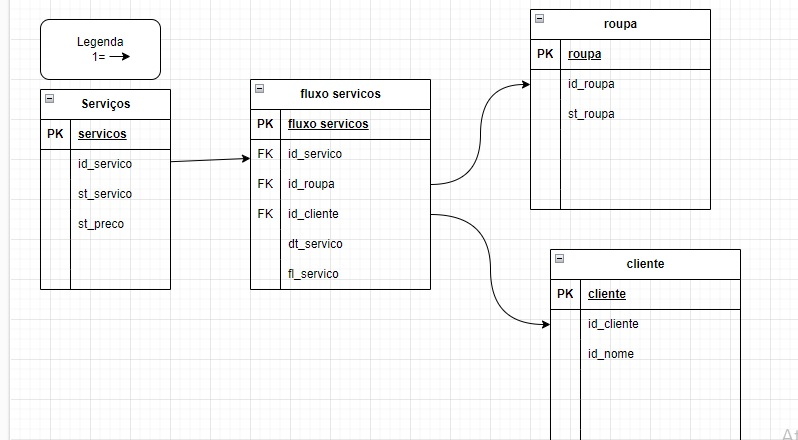

Resposta esperada: Um desenho de tabelas e suas relações, indicação de qual modelo de estrutura escolheu.

### Desafio 2

Inserir valores em todas as tabelas

Resposta esperada: Consultas de todas as tabelas evidênciando os dados preenchidos.

In [ ]:
# Importar a biblioteca
import sqlite3


#Criar uma conexão com um banco de dados (no nosso caso, não temos um arquivo de banco de dados pré feito, então decidiu-se inicializar um denominado bichos.db)
conn = sqlite3.connect("consertos.db")

# Criar um cursor no banco que permitirá o uso de comandos no formato SQL
cur  = conn.cursor()

In [ ]:
# Criando a tabela servicos
cur.execute("DROP TABLE IF EXISTS servicos")

#criando a tabela servicos
cur.execute("""
CREATE TABLE servicos(
  id_servico TEXT NOT NULL PRIMARY KEY,
  st_nome TEXT NOT NULL,
  fl_preco REAL NOT NULL
)
""")

# Criando a tabela roupa
cur.execute("DROP TABLE IF EXISTS roupa")
cur.execute("""
CREATE TABLE roupa(
  id_roupa TEXT NOT NULL PRIMARY KEY,
  st_tipo TEXT NOT NULL,
  st_peça TEXT NOT NULL

)
""")

# Criando a tabela clientes
cur.execute("DROP TABLE IF EXISTS cliente")

cur.execute("""
CREATE TABLE cliente(
  id_cliente TEXT NOT NULL PRIMARY KEY,
  st_nome TEXT NOT NULL
)
""")

In [ ]:
# Criando a tabela fluxo de servicos
cur.execute("DROP TABLE IF EXISTS fluxo_de_servicos")

cur.execute("""
CREATE TABLE fluxo_de_servicos(
  id_servico TEXT NOT NULL PRIMARY KEY,
  id_roupa TEXT NOT NULL,
  id_cliente TEXT NOT NULL,
  dt_servico TEXT NOT NULL,
  fl_servico NOT NULL,
  FOREIGN KEY (id_servico)
      REFERENCES servicos (id_servico)
         ON DELETE CASCADE
         ON UPDATE NO ACTION,
  FOREIGN KEY (id_roupa)
      REFERENCES pet (id_roupa)
         ON DELETE CASCADE
         ON UPDATE NO ACTION,
  FOREIGN KEY (id_cliente)
      REFERENCES cliente (id_cliente)
         ON DELETE CASCADE
         ON UPDATE NO ACTION
)
""")

In [ ]:
#cliente
cur.execute("""
INSERT INTO cliente
VALUES
("c1", 'Josefina Andrade'),
("c2", 'Maria Filomena'),
("c3", 'Antônio Maria'),
("c4", 'Josefer Correia'),
("c5", 'Maria Felicidade');
""")


In [ ]:
# Comitar as inserções
conn.commit()

In [ ]:
# Inserindo dados na tabela servicos
cur.execute("""
INSERT INTO servicos  VALUES
('s1', 'bainha', 30.00),
('s2', 'redução tamanho', 70.00),
('s3', 'pequenos ajustes', 30.00),
('S4', 'inserção zíper', 30.00),
('S5', 'customização', 30.00)

""")

In [ ]:
# Comitar as inserções
conn.commit()


In [ ]:
# Inserindo dados na tabela roupa

cur.execute("""
INSERT INTO  roupa  VALUES
("r1", 'calça','calça' ),
("r2", 'vestido', 'vestido'),
("r3", 'camisa', 'camisa'),
("r4", 'camiseta', 'camiseta'),
("r5", 'shorts', 'shorts'),
("r6", 'saia', 'saia'),
("r7", 'terno', 'terno')
""")



In [ ]:
# Comitar as inserções
conn.commit()

In [ ]:
# Inserindo dados na tabela atendimento

cur.execute("""
INSERT INTO fluxo_de_servicos VALUES
(12, 's1', 'r1', 'c1', '2024-07-01'),
(13, 's1', 'r2', 'c2', '2024-07-01'),
(14, 's4', 'r5', 'c5', '2024-07-01'),
(15, 's4', 'r1', 'c3', '2024-07-01'),
(16, 's2', 'r7', 'c4', '2024-07-01')
""")

# inclui a partir 12 pois no primeiro que fiz, fui incluir mais um dados de serviço e ficou apresentando erro, e a maneira de não apresentar mais que identifiquei mai prática foi essa para o momento, mas vou revisar mais opções posteriormente.

In [ ]:
# Comitar as inserções
conn.commit()

### Desafio 3

Responder necessidade de negócio:


*   Qual o serviço mais usado da loja de consertos?

Ajuste de bainha e inserção zíper

*   Qual o tipo de roupa tem mais conserto? Calça
*   Qual a receita de consertos dos dados registrados?

[(10120.0,)] fiquei na dúvida sobre o resultado, não sei se é o caso de usar algum comando para melhor visualização (tipo de casas decimais)

*   Quais os ids mais importantes que preciso?
id_servico, id_roupa, id_cliente.


Resposta esperada: Respostas de acordo com o desenho e o preenchimento feito.


In [ ]:
#Qual o serviço mais usado da loja?
res = cur.execute("""
SELECT
  servico_id,
  count(servico_id)
FROM
  fluxo_de_serviços
GROUP BY
  servico_id
""")
res.fetchall()

[('s1', 6), ('s2', 3), ('s4', 6)]

In [ ]:
# Qual o tipo de roupa tem mais conserto?

res = cur.execute("""
SELECT
  st_tipo,
  count(st_tipo)
FROM
  roupa
  st_tipo
""")
res.fetchall()

[('calça', 7)]

In [ ]:
# Qual a receita de consertos dos dados registrados?

res = cur.execute("""
SELECT
  SUM(fl_servico)
FROM
  fluxo_de_servicos
""")
res.fetchall()


[(10120.0,)]

Quais os ids mais importantes que preciso?



*   id_serviço
*   id_roupa
*   id_cliente



